In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sb
import seaborn as sns

Use the dataset framingham, the data set is used to predict the 10 year risk of coronary heart disease CHD. The following is description of each feature. 

• Sex: male or female(Nominal) <br>
• Age: Age of the patient; <br>
Behavioral<br>
• Current Smoker: whether or not the patient is a current smoker <br>
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.<br>
Medical( history)<br>
• BP Meds: whether or not the patient was on blood pressure medication <br>
• Prevalent Stroke: whether or not the patient had previously had a stroke <br>
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)<br>
• Diabetes: whether or not the patient had diabetes <br>
Medical(current)<br>
• Tot Chol: total cholesterol level <br>
• Sys BP: systolic blood pressure <br>
• Dia BP: diastolic blood pressure <br>
• BMI: Body Mass Index <br>
• Heart Rate: heart rate <br>
• Glucose: glucose level <br>
Predict variable (desired target)<br>
• 10 year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)<br>

In [18]:
HD_df = pd.read_csv(filepath_or_buffer='framingham.csv')
HD_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


1. Identify what are the data types of each column. (10)

Write your answer here <br>
• Sex: (Nominal) <br>
• Age: (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) <br>
• Education: Ordinal <br>
Behavioral<br>
• Current Smoker: (Nominal)<br>
• Cigs Per Day: (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br>
Medical( history)<br>
• BP Meds: (Nominal)<br>
• Prevalent Stroke: (Nominal)<br>
• Prevalent Hyp: (Nominal)<br>
• Diabetes: (Nominal)<br>
Medical(current)<br>
• Tot Chol: (Continuous)<br>
• Sys BP: (Continuous)<br>
• Dia BP: (Continuous)<br>
• BMI: (Continuous)<br>
• Heart Rate: (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>
• Glucose: (Continuous)<br>
Predict variable (desired target)<br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)<br>

2. Create a correlation heatmap of the data (10)

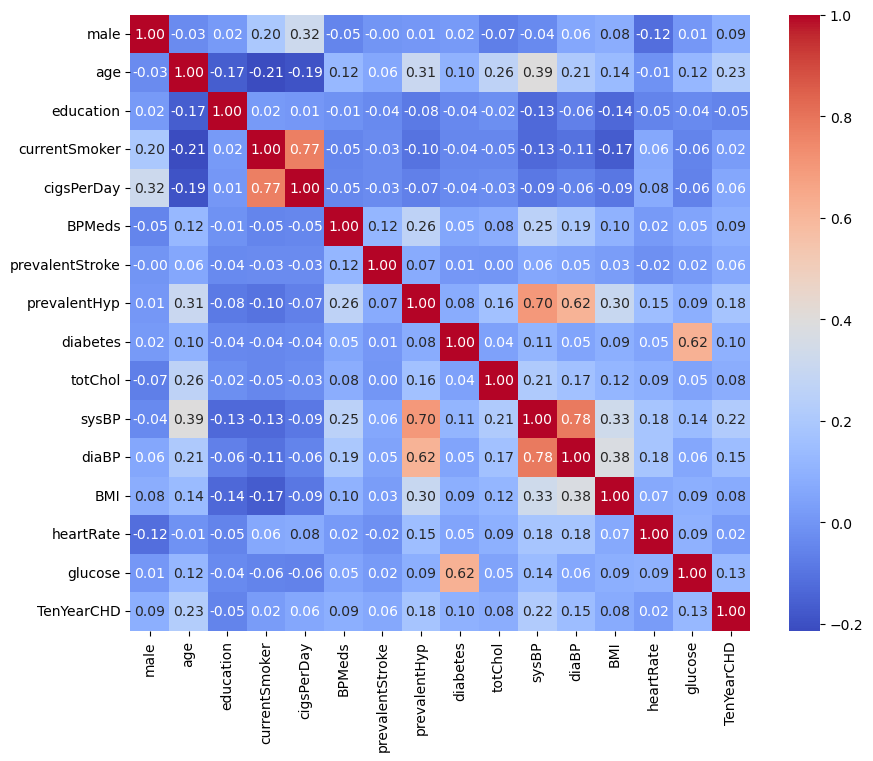

In [19]:
correlation_matrix = HD_df.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

3. According to the heatmap, do you think some of the feature should not be count in the logistic regression? Which ones? (10)

**Some features that we might not want to include in the logistic regression are currentSmoker and cigsPerDay as they have a correlation coefficient of .77 which is the highest amongst the entire heatmap.**

4. How many empty values are there in each risk factor?(10)

In [29]:
HD_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

5. Show how you will handle these null values for each risk factor? Why? (10)

**I will impute all of the null values meaning I will replace the null values with the mean of the values of that specific column/feature.**

6. Handle these null values. (10)

In [28]:
cleaned_HD_df = HD_df.copy()
cleaned_HD_df.fillna(HD_df.mean(), inplace = True)

7. Show the histogram of each factors(10)

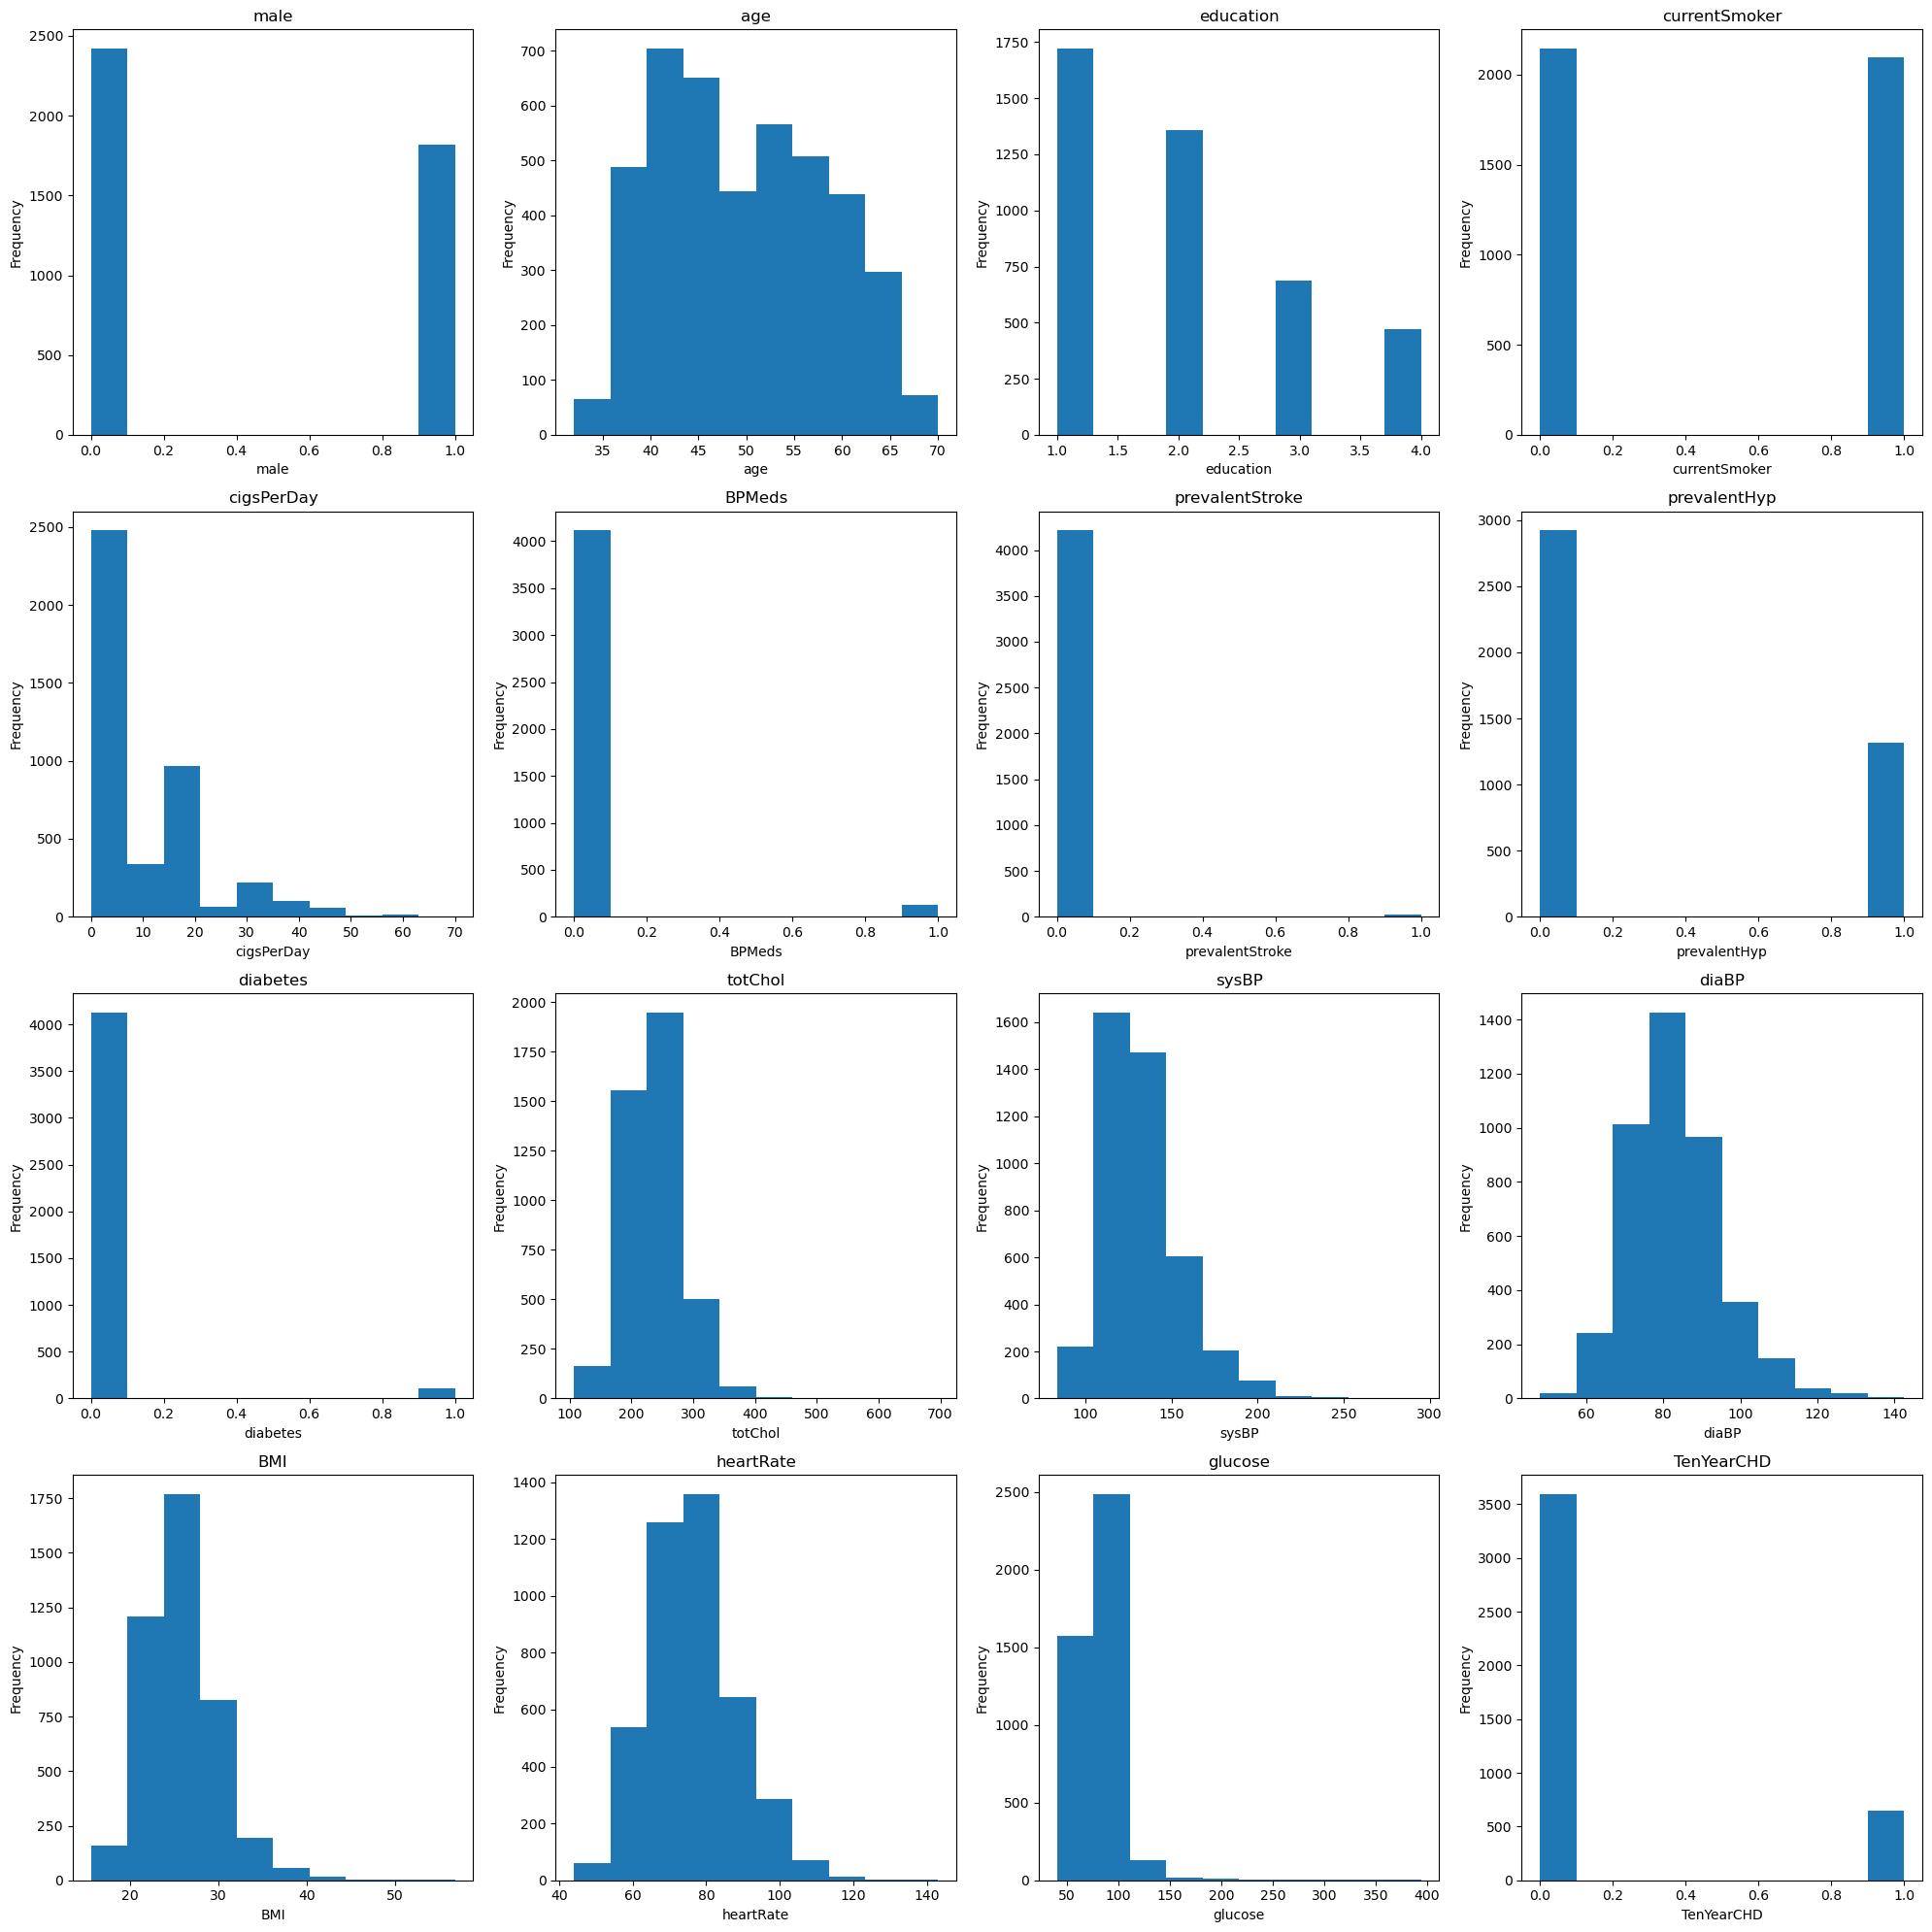

In [22]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, column in enumerate(cleaned_HD_df.columns):
    ax = axes.flatten()[i]
    cleaned_HD_df[column].plot(kind='hist', ax=ax)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


8. Split the data set into X_train, X_test, y_train, y_test. (10)

In [23]:
from sklearn.model_selection import train_test_split
y = cleaned_HD_df['TenYearCHD']
X = cleaned_HD_df.drop(columns = ['TenYearCHD'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

9. Train the value and show the predict result of first 10 data points. (10)

In [24]:
import warnings
from sklearn.linear_model import LogisticRegression

warnings.simplefilter("ignore")

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test[:10])

print("Predictions: ", predictions)


Predictions:  [0 0 0 0 0 0 0 0 0 0]


10. Evaluate the model.(10) (You can use any score or method to evaluate the model, but you need to explain detail about your result)

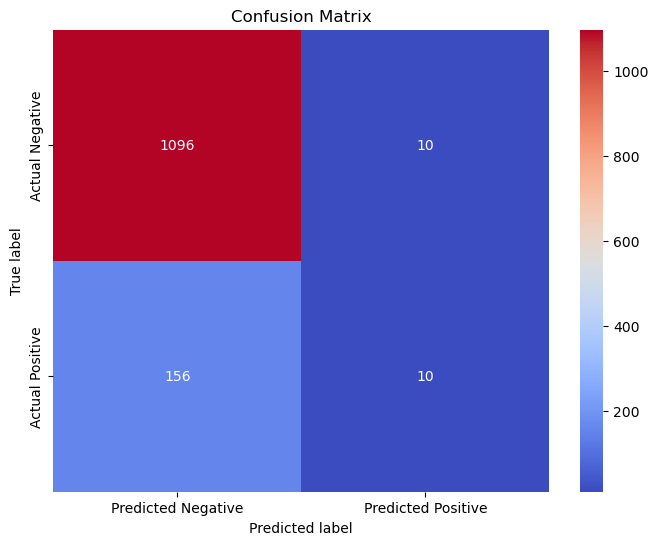

In [25]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [26]:
true_negative = cm[0,0]
false_negative = cm[1,0]
true_positive = cm[1,1]
false_positive = cm[0,1]

accuracy = (true_positive + true_negative) / (true_negative + true_positive + false_negative + false_positive)
precision = (true_positive) / (true_positive + false_positive)
print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.8694968553459119
Precision: 0.5


According to my confusion matrix, the accuracy of the model is 0.8694968553459119. This means that our model predicted correctly 87% of the instances in the dataset and is a great predictor for the dataset. Another metric we could use is precision which shows how well the model predicts positive outcomes. We see that the precision is 50% which is not ideal which suggests that the model is not good at predicting positive values. The reason for the higher accuracy and low precision could be attributed to the model's good performance when predicting negative outcomes.